# Homework 6
### Grant White

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
def pendulum(alpha, beta, T, N, tol=1e-15, max_iter=7):
    """
    theta''(t) = -sin(theta(t)) for 0 < t < T
    theta(0) = alpha, theta(T) = beta
    """
    
    #initialize
    h = 1 / N
    t = np.linspace(0, 1, N+1)
#     theta = .7*np.cos(t) + .5*np.sin(t)    #initial guess
    theta = np.full(len(t), .7)
    theta[0], theta[-1] = alpha, beta      #initial conditions
    delta = [np.inf]
    
    #G and J functions
    G = lambda th: (th[:-2] - 2*th[1:-1] + th[2:]) / h**2 + np.sin(th[1:-1])
    J = lambda th: (np.diag(np.ones(N-2), -1)
                    + np.diag(h**2*np.cos(th[1:-1]) - 2)
                    + np.diag(np.ones(N-2), 1)) / h**2
    
    #initialize plot
    plt.title('N = {}'.format(N))
    plt.xlabel('t')
    plt.ylabel(r'$\theta(t)$')
    
    #iterate
    k = 0
    plt.plot(t, theta, label='initial guess', lw=1.5)
    while k < max_iter and np.linalg.norm(delta, ord=np.inf) > tol:
        delta = np.linalg.solve(J(theta), -G(theta))
        theta[1:-1] += delta
        k += 1
        plt.plot(t, theta, label='k = {}'.format(k), lw=1.5)
    
    plt.legend()
    plt.show()
    return t, theta

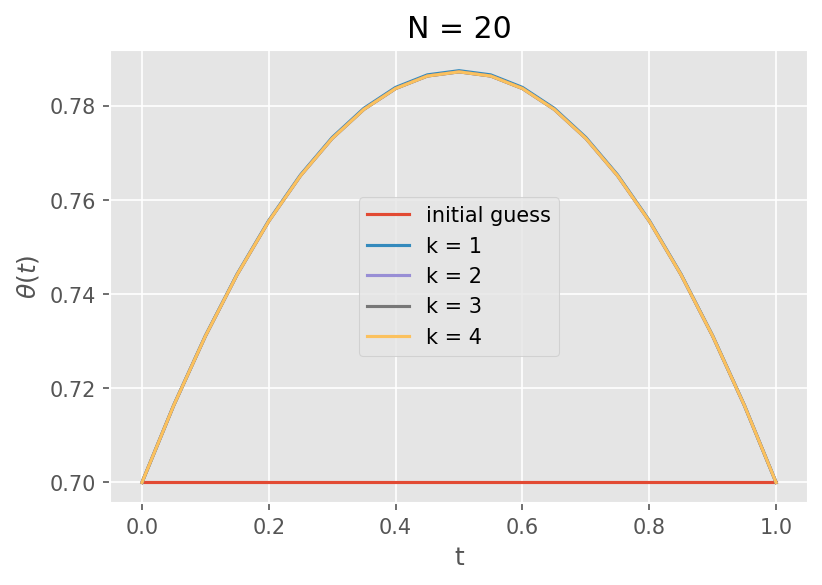

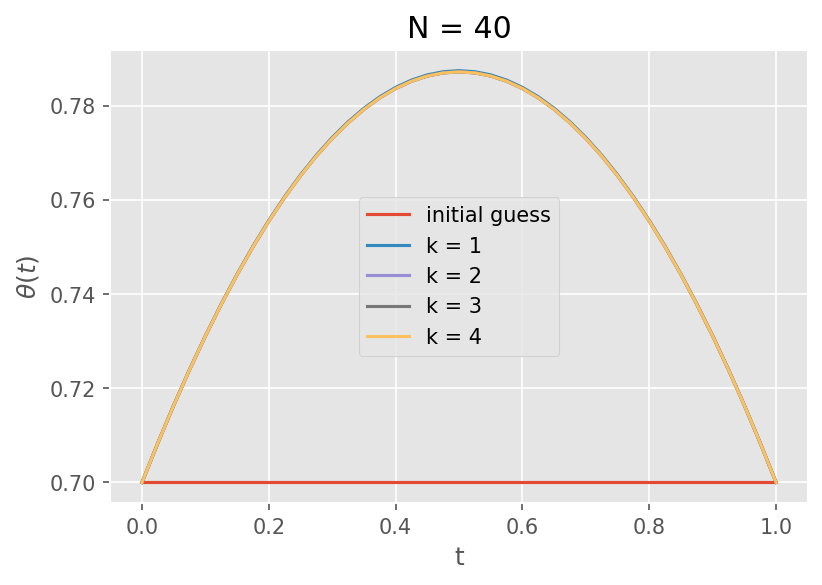

In [3]:
alpha, beta, T = .7, .7, 2*np.pi
x_20, theta_20 = pendulum(alpha, beta, T, 20)
x_40, theta_40 = pendulum(alpha, beta, T, 40)